# Importing necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [7]:
df = pd.read_csv("../Data/Fraud.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.shape

(6362620, 11)

In [9]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

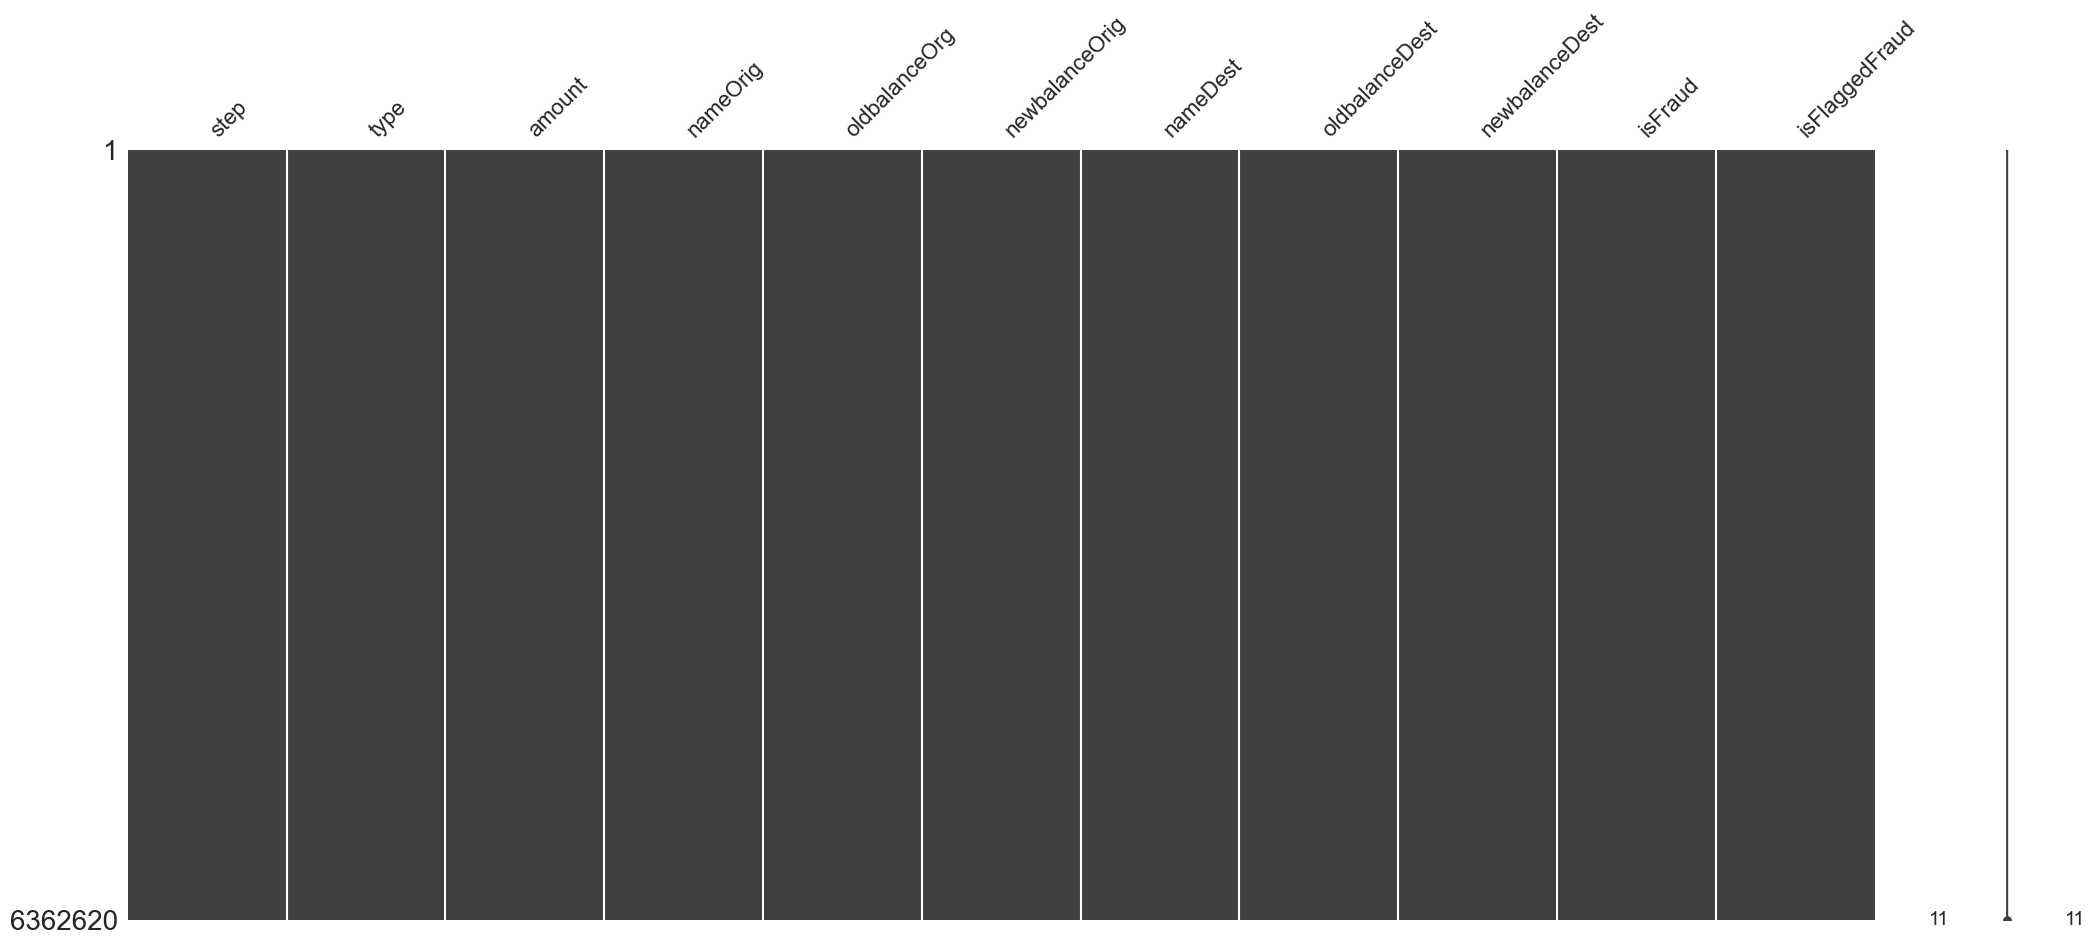

In [12]:
ms.matrix(df)

In [13]:
fraudCount = df['isFraud'].value_counts()

print(f"Fraud Distribution: {fraudCount}") # Extreme imbalance between fraud and not fraud, can't use the standard accuracy metrics. 

                                           # Main focus will be Precission, Recall, F1-Score.. 

Fraud Distribution: isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [14]:
merchant_dest_data = df[df['nameDest'].str.startswith('M')]

In [ ]:
print("-------Original Dataset Shape-------n")

df.shape

-------Original Dataset Shape-------



(6362620, 11)

In [ ]:
print("-------Merchant Data Set Shape-------")

merchant_dest_data.shape

-------Merchant Data Set Shape-------


(2151495, 11)

In [28]:
fraud_type = df.groupby('type').agg({
    'isFraud': ['count','sum', 'mean']
}).round(3)

fraud_type_columns = ['Total Transactions', 'Fraud Count', 'Fraud Rate']

print(fraud_type)

          isFraud             
            count   sum   mean
type                          
CASH_IN   1399284     0  0.000
CASH_OUT  2237500  4116  0.002
DEBIT       41432     0  0.000
PAYMENT   2151495     0  0.000
TRANSFER   532909  4097  0.008


<Axes: xlabel='type', ylabel='amount'>

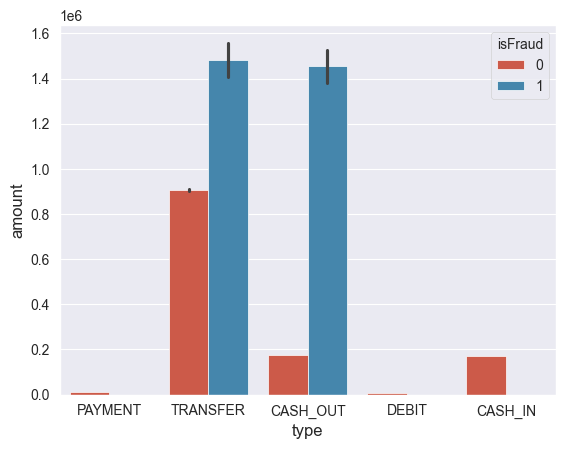

In [30]:
fraud_type_amounts = df[df['isFraud'].isin([0,1])]
sns.barplot(data=fraud_type_amounts, x='type', y='amount', hue='isFraud')

## Could be difficult to train as the Tranfer and Cash Out type has a dramatical increase the in the fraud rate
## This would make the model to think, if the transaction type is not tranfer or cashout it's not a fraud

In [ ]:
# Downsampling non-fraud cases to the same size as fraud cases to avoid making the fraud cases to look invisible

In [36]:
fraud_df = df[df['isFraud'] == 1]
fraud_df['isFraud'].sum()

np.int64(8213)

In [42]:
non_fraud_df = df[df['isFraud'] ==  0].sample(n=len(fraud_df), random_state=42)
non_fraud_df['isFraud'].value_counts()

isFraud
0    8213
Name: count, dtype: int64

In [48]:
balanced_fraud_df = pd.concat([non_fraud_df, fraud_df]).sample(n=len(fraud_df + non_fraud_df),random_state=42)

In [49]:
balanced_fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6055134,496,TRANSFER,766151.45,C2014325113,766151.45,0.00,C432435900,0.00,0.00,1,0
5188022,365,TRANSFER,31315.51,C1174332140,31315.51,0.00,C1252332991,0.00,0.00,1,0
4129254,302,PAYMENT,19043.02,C562601456,70067.00,51023.98,M1194092449,0.00,0.00,0,0
5555890,383,PAYMENT,11162.03,C1407068513,102921.00,91758.97,M175386067,0.00,0.00,0,0
5046728,354,CASH_OUT,268851.80,C626747845,220431.00,0.00,C833477591,1641753.59,1910605.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3611349,273,TRANSFER,159106.12,C1424958936,159106.12,0.00,C1471537489,0.00,0.00,1,0
4782248,336,TRANSFER,170038.31,C498550702,170038.31,0.00,C982724683,0.00,0.00,1,0
433961,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0,0
3215772,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0,0


In [ ]:
balanced_fraud_df['isFraud'].value_counts() # Data Ready For Plotting

isFraud
1    8213
0    8213
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='amount'>

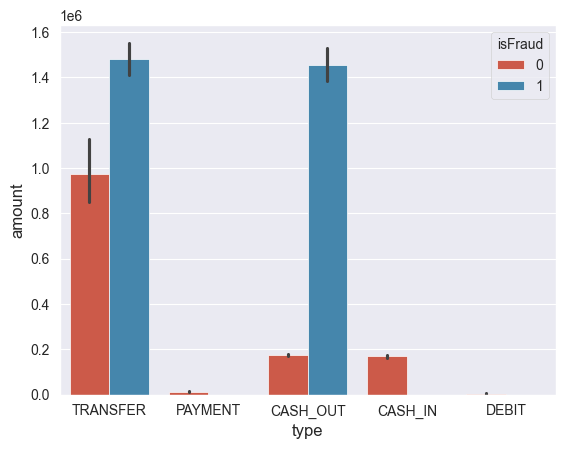

In [58]:

sns.barplot(data=balanced_fraud_df, x='type', y='amount', hue='isFraud')

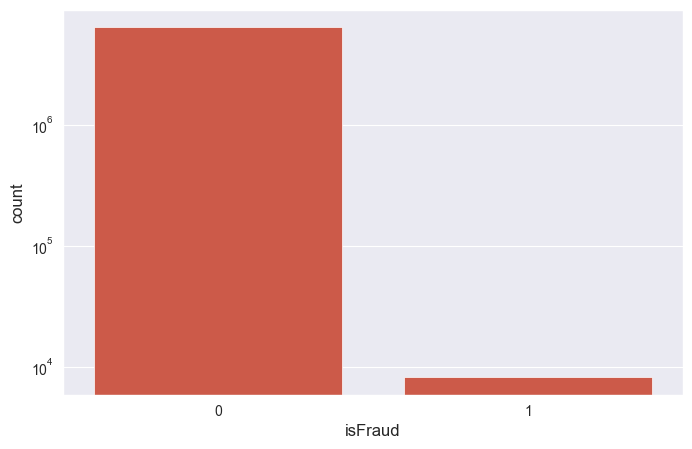

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='isFraud')
plt.yscale('log')
plt.show()

Seems like there aren't much "isFraud" data

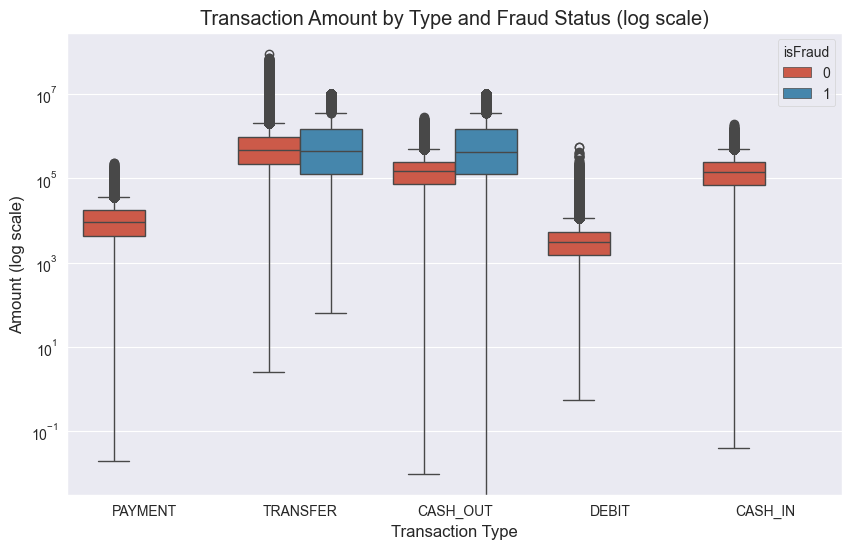

In [65]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='type', y='amount', hue='isFraud')

plt.yscale('log') # Log scale due to wide range of amount values

plt.title('Transaction Amount by Type and Fraud Status (log scale)')

plt.xlabel('Transaction Type')

plt.ylabel('Amount (log scale)')

plt.legend(title='isFraud')

plt.show()

In [70]:
balanced_fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6055134,496,TRANSFER,766151.45,C2014325113,766151.45,0.00,C432435900,0.00,0.00,1,0
5188022,365,TRANSFER,31315.51,C1174332140,31315.51,0.00,C1252332991,0.00,0.00,1,0
4129254,302,PAYMENT,19043.02,C562601456,70067.00,51023.98,M1194092449,0.00,0.00,0,0
5555890,383,PAYMENT,11162.03,C1407068513,102921.00,91758.97,M175386067,0.00,0.00,0,0
5046728,354,CASH_OUT,268851.80,C626747845,220431.00,0.00,C833477591,1641753.59,1910605.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3611349,273,TRANSFER,159106.12,C1424958936,159106.12,0.00,C1471537489,0.00,0.00,1,0
4782248,336,TRANSFER,170038.31,C498550702,170038.31,0.00,C982724683,0.00,0.00,1,0
433961,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0,0
3215772,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0,0


In [75]:
df['step_group'] = df['step'] // 24

In [76]:
daily_counts = df.groupby(['step_group', 'isFraud']).size().reset_index(name='count')

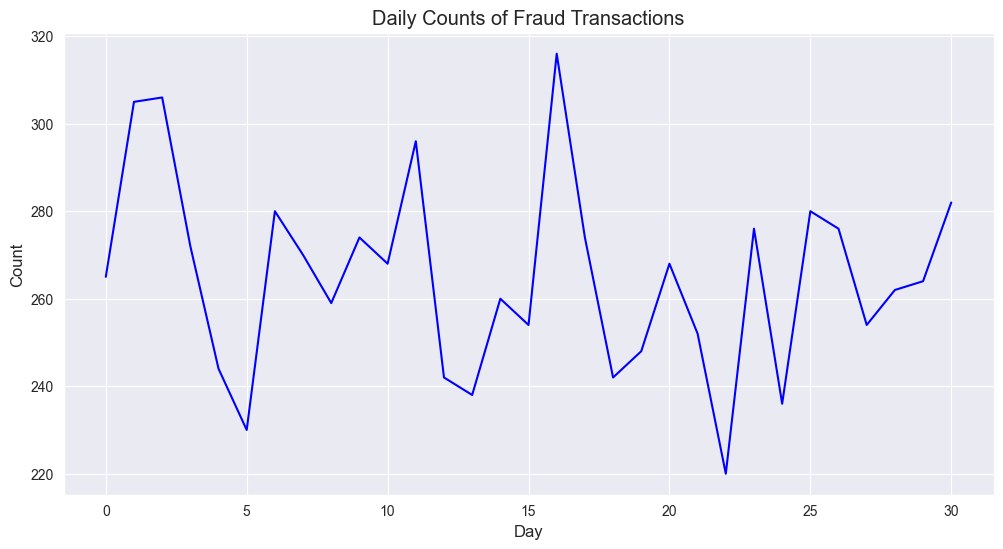

In [77]:
plt.figure(figsize=(12,6))
fraud_counts = daily_counts[daily_counts['isFraud'] == 1]
sns.lineplot(data=fraud_counts, x='step_group', y='count', color='blue')
plt.title('Daily Counts of Fraud Transactions')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


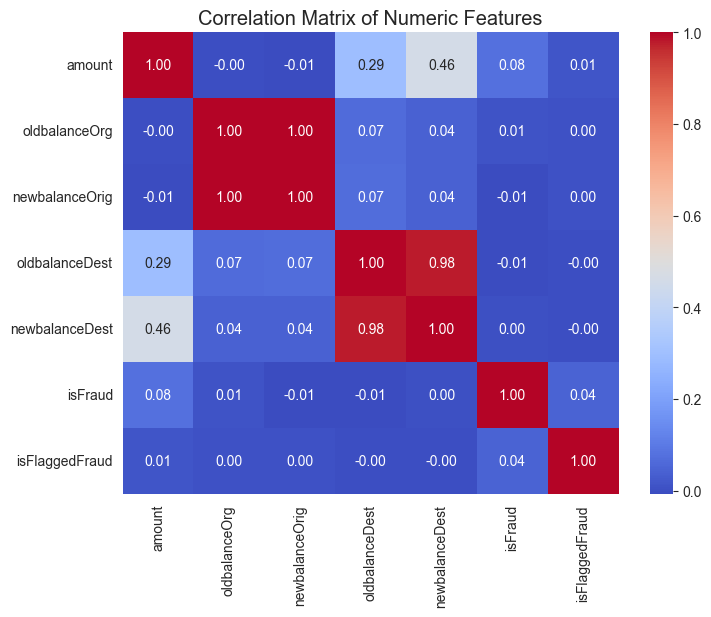

In [78]:
plt.figure(figsize=(8,6))

numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Numeric Features')

plt.show()

In [79]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix

from imblearn.over_sampling import SMOTE

In [ ]:
df['is_merchant_dest'] = df['nameDest'].str.startswith('M').astype(int)

df['is_merchant_orig'] = df['nameOrig'].str.startswith('M').astype(int)

# SAFE: Use old balances only (available before transaction)

df['amount_to_orig_balance'] = df['amount'] / (df['oldbalanceOrg'] + 1)

df['amount_to_dest_balance'] = df['amount'] / (df['oldbalanceDest'] + 1)

# Time features (available before transaction)

df['hour_of_day'] = df['step'] % 24

df['day_of_simulation'] = df['step'] // 24

df['is_night'] = ((df['hour_of_day'] >= 22) | (df['hour_of_day'] <= 5)).astype(int)

df['is_weekend'] = ((df['day_of_simulation'] % 7) >= 5).astype(int)

# Transaction pattern features (available before transaction)

df['is_large_amount'] = (df['amount'] >= 200000).astype(int)

df['is_round_amount'] = (df['amount'] % 50000 == 0).astype(int)

df['is_cash_out'] = (df['type'] == 'CASH_OUT').astype(int)

df['is_transfer'] = (df['type'] == 'TRANSFER').astype(int)

# Account status features (available before transaction)

df['orig_account_empty'] = (df['oldbalanceOrg'] == 0).astype(int)

df['dest_account_empty'] = (df['oldbalanceDest'] == 0).astype(int)

# Encode transaction type

le = LabelEncoder()

df['type_encoded'] = le.fit_transform(df['type'])

In [85]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'step\_group', 'step_group', 'is_merchant_dest',
       'is_merchant_orig', 'amount_to_orig_balance', 'amount_to_dest_balance',
       'hour_ofday', 'day_of_simulation', 'hour_of_day', 'is_night',
       'is_weekend', 'is_large_amount', 'is_round_amount', 'is_cash_out',
       'is_transfer', 'orig_account_empty', 'dest_account_empty',
       'will_drain_account', 'type_encoded'],
      dtype='object')

In [87]:
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score

feature_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',

                 'oldbalanceDest', 'newbalanceDest', 'type_encoded',

                  'is_merchant_dest', 'account_drained', 'large_round_transfer',

                  'amount_to_orig_balance', 'hour_of_day', 'is_night']

safe_feature_cols = [

    'step', 'amount', 'oldbalanceOrg', 'oldbalanceDest',

     'type_encoded', 'is_merchant_dest', 'is_merchant_orig',

     'amount_to_orig_balance', 'amount_to_dest_balance',

     'hour_of_day', 'day_of_simulation', 'is_night', 'is_weekend',

     'is_large_amount', 'is_round_amount',

     'orig_account_empty', 'dest_account_empty'

]

leaky_features = ['newbalanceOrig', 'newbalanceDest', 'account_drained', 'large_round_transfer']

X = df[safe_feature_cols]

y = df['isFraud']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

In [89]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [90]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

In [91]:
rf.fit(X_train_balanced, y_train_balanced)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [92]:
y_pred = rf.predict(X_test)

y_prob = rf.predict_proba(X_test)[:, 1]

print("= FRAUD DETECTION EVALUATION =")

print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}") 

print(f"AUC-PR: {average_precision_score(y_test, y_prob):.4f}")

print("\\nClassification Report:")

print(classification_report(y_test, y_pred))

= FRAUD DETECTION EVALUATION =
AUC-ROC: 0.9993
AUC-PR: 0.9973
\nClassification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.99      1.00      0.99      2053

    accuracy                           1.00   1590655
   macro avg       0.99      1.00      1.00   1590655
weighted avg       1.00      1.00      1.00   1590655

